In [1]:
# ======================================================
# 1. Imports
# ======================================================
import numpy as np
import math
import time
import statistics as stats
import matplotlib.pyplot as plt


In [2]:
# ======================================================
# 2. Core Implementations (4 methods)
# ======================================================

def leibniz_pi_mod(n: int) -> float:
    """Loop with if-mod to compute π/4."""
    total = 0.0
    for k in range(n):
        term = 1 / (2*k + 1)
        total += term if k % 2 == 0 else -term
    return total

def leibniz_pi_numpy(n: int) -> float:
    """Vectorized NumPy version for π/4."""
    k = np.arange(n)
    return np.sum(((-1) ** k) / (2*k + 1))

def leibniz_pi_numpy_indexing(n: int) -> float:
    """Split positive/negative terms with slicing."""
    k = np.arange(n)
    terms = ((-1)**k) / (2*k + 1)
    return np.sum(terms[::2]) + np.sum(terms[1::2])

def leibniz_pi_pairs(n: int) -> float:
    """Paired-term summation (faster convergence)."""
    if n <= 0:
        return 0.0
    m = n - (n % 2)  # largest even ≤ n
    k = np.arange(0, m, 2, dtype=float)
    paired = np.sum(1.0/(2.0*k + 1.0) - 1.0/(2.0*k + 3.0))
    if n % 2 == 1:
        last = n - 1
        paired += ((-1.0)**last) / (2.0*last + 1.0)
    return paired


In [3]:
# ======================================================
# 3. Benchmark Utilities
# ======================================================
def abs_error_vs_pi(sum_over_4: float) -> float:
    """Absolute error of π approximation."""
    return abs(4.0 * float(sum_over_4) - math.pi)

def time_per_call(fn, n, repeats=5, number=1000):
    """Measure per-call execution time in seconds."""
    times = []
    for _ in range(repeats):
        t0 = time.perf_counter()
        for _ in range(number):
            fn(n)
        t1 = time.perf_counter()
        times.append((t1 - t0) / number)
    return stats.median(times), stats.mean(times), min(times)

def run_experiments(n=5000):
    """Run all methods and report accuracy + runtime."""
    funcs = [
        ("mod", leibniz_pi_mod),
        ("numpy", leibniz_pi_numpy),
        ("numpy_indexing", leibniz_pi_numpy_indexing),
        ("pairs", leibniz_pi_pairs),
    ]
    
    rows = []
    for name, fn in funcs:
        s_over_4 = fn(n)
        approx_pi = 4.0 * s_over_4
        err = abs_error_vs_pi(s_over_4)
        med_t, mean_t, best_t = time_per_call(fn, n)
        rows.append({
            "name": name, "pi": approx_pi, "err": err,
            "t_med_ms": med_t*1e3, "t_mean_ms": mean_t*1e3, "t_best_ms": best_t*1e3
        })
    
    # Sort by median time ascending
    rows.sort(key=lambda r: r["t_med_ms"])
    return rows


In [4]:
# ======================================================
# 4. Run Benchmark
# ======================================================
rows = run_experiments(n=5000)

print(f"{'Function':15} {'π approx':>12} {'Abs error':>12} "
      f"{'t_med [ms]':>12} {'t_mean [ms]':>12} {'t_best [ms]':>12}")
print("-"*80)
for r in rows:
    print(f"{r['name']:15} {r['pi']:12.6f} {r['err']:12.6f} "
          f"{r['t_med_ms']:12.3f} {r['t_mean_ms']:12.3f} {r['t_best_ms']:12.3f}")


Function            π approx    Abs error   t_med [ms]  t_mean [ms]  t_best [ms]
--------------------------------------------------------------------------------
pairs               3.141393     0.000200        0.007        0.007        0.007
numpy               3.141393     0.000200        0.028        0.028        0.027
numpy_indexing      3.141393     0.000200        0.029        0.029        0.029
mod                 3.141393     0.000200        0.217        0.220        0.213


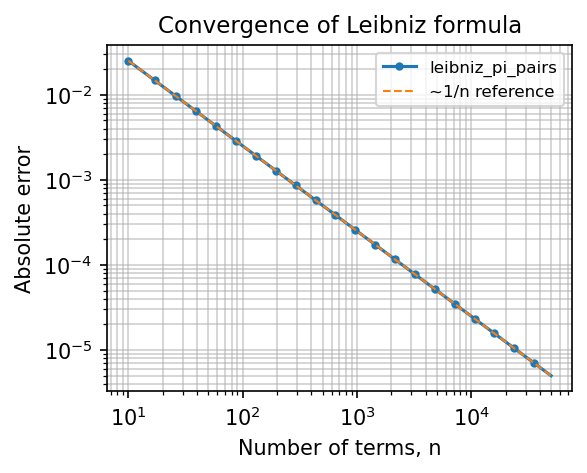

In [5]:
# ======================================================
# 5. Convergence Plot
# ======================================================
def plot_convergence(method, n_max=100000, num_points=150):
    """Plot error vs n for a chosen method."""
    n_vals = np.unique(np.logspace(1, np.log10(n_max), num_points, dtype=int))
    errors = [abs(method(n) - math.pi/4) for n in n_vals]
    
    ref = (1.0 / n_vals) * errors[len(errors)//2] * n_vals[len(errors)//2]
    
    plt.figure(figsize=(4, 3), dpi=150)
    plt.loglog(n_vals, errors, linewidth=1.5, marker='o', markersize=3,
               markevery=max(1, len(n_vals)//20), label=f"{method.__name__}")
    plt.loglog(n_vals, ref, '--', linewidth=1.0, label="~1/n reference")
    plt.xlabel("Number of terms, n", fontsize=10)
    plt.ylabel("Absolute error", fontsize=10)
    plt.title("Convergence of Leibniz formula", fontsize=11)
    plt.legend(fontsize=8)
    plt.grid(True, which="both", alpha=0.6)
    plt.show()

# Example: show convergence for paired method
plot_convergence(leibniz_pi_pairs, n_max=50000)


# Summary of LLM Review Improvement

## Keep only the core methods, remove redundant ones

    Keep 4 representative implementations:

    leibniz_pi_mod (basic loop with mod)

    leibniz_pi_numpy (vectorized NumPy)

    leibniz_pi_numpy_indexing (slicing optimization)

    leibniz_pi_pairs (paired summation, faster convergence)

    Remove set and dict versions that add no real value.

## Unified testing and benchmarking

    Added a run_experiments(n) function to run all methods at once.

    Eliminates repeated testing code across cells.

## Better benchmark output

    Table includes π approximation, absolute error, execution time (median, mean, best).

    Automatically sorts results by median runtime.

    time_per_call made more flexible with adjustable parameters.

## Improved visualization

    Added plot_convergence(method, n_max, num_points) to show error vs n for any method.

    Uses log-log scale with ~1/n reference slope for clarity.

    Easy to switch between methods for comparison.

## Improved readability and teaching value

    Clear docstrings for each function.

    Benchmarking and plotting encapsulated in reusable functions.

    Notebook is more compact and structured for demonstration.